## **IMPORT ALL THE REQUIRED LIBRARIES**

---
*   **Pandas** to import data into a data frame and manipulate the data.
*   **Seaborn** and **matplotlib** to visualise the data and perform analysis.
*   **sklearn** to fit data into a decision tree and check important features.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

## **IMPORT DATA**

---

Import the csv data provided into pandas dataframe and check first 10 rows.

In [2]:
cwk_data = pd.read_csv('cwk_data_lixch37.csv')

cwk_data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y
0,50,services,married,primary,no,-15,no,yes,unknown,2,71,1,-1,0,unknown,no
1,33,blue-collar,married,primary,no,41,yes,no,cellular,13,173,1,-1,0,unknown,no
2,32,management,single,tertiary,no,1493,yes,no,unknown,28,65,11,-1,0,unknown,no
3,47,management,single,tertiary,no,86,no,no,cellular,5,253,1,97,4,success,yes
4,37,services,divorced,secondary,no,398,yes,yes,unknown,5,214,2,-1,0,unknown,no
5,30,technician,divorced,secondary,no,0,no,no,cellular,21,101,1,-1,0,unknown,no
6,52,management,married,tertiary,no,1111,no,no,unknown,5,17,1,-1,0,unknown,no
7,34,blue-collar,married,secondary,no,205,yes,yes,cellular,7,309,1,-1,0,unknown,no
8,34,technician,divorced,secondary,no,136,yes,no,cellular,8,136,2,-1,0,unknown,no
9,34,self-employed,married,primary,no,7468,yes,yes,cellular,30,383,1,-1,0,unknown,yes


In [3]:
#Encoding
from sklearn.preprocessing import OrdinalEncoder

encoded_data = cwk_data.copy()
ord_enc = OrdinalEncoder(dtype=int)
encoded_data[["job","marital","education","default","housing","loan","contact","poutcome"]] = ord_enc.fit_transform(cwk_data[["job","marital","education","default","housing","loan","contact","poutcome"]])
encoded_data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y
0,50,7,1,0,0,-15,0,1,2,2,71,1,-1,0,3,no
1,33,1,1,0,0,41,1,0,0,13,173,1,-1,0,3,no
2,32,4,2,2,0,1493,1,0,2,28,65,11,-1,0,3,no
3,47,4,2,2,0,86,0,0,0,5,253,1,97,4,2,yes
4,37,7,0,1,0,398,1,1,2,5,214,2,-1,0,3,no
5,30,9,0,1,0,0,0,0,0,21,101,1,-1,0,3,no
6,52,4,1,2,0,1111,0,0,2,5,17,1,-1,0,3,no
7,34,1,1,1,0,205,1,1,0,7,309,1,-1,0,3,no
8,34,9,0,1,0,136,1,0,0,8,136,2,-1,0,3,no
9,34,6,1,0,0,7468,1,1,0,30,383,1,-1,0,3,yes


## **CLEANING THE DATA**

---

Using box plots, we can check if there are any outliers and remove them.

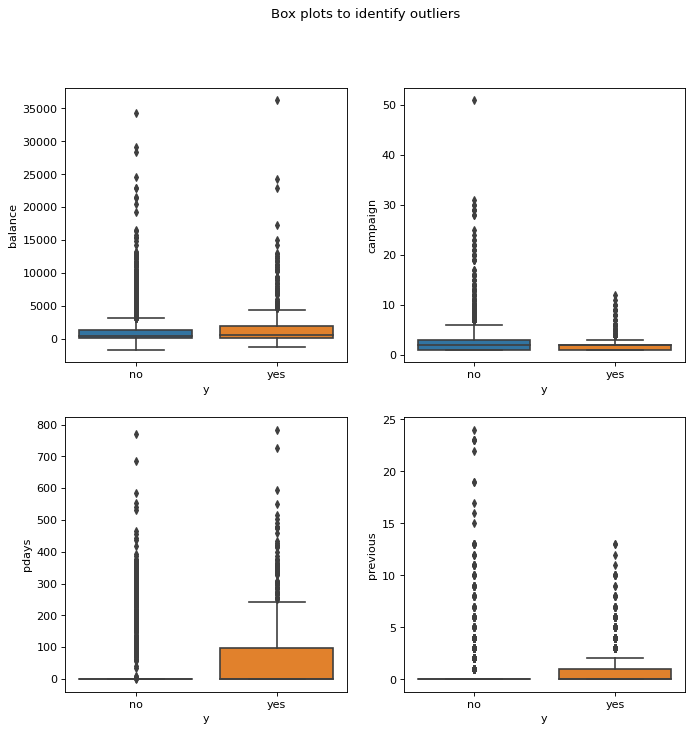

In [4]:
#Plot box plots.

fig, axs = plt.subplots(2,2, figsize=(10,10),dpi=80)
fig.suptitle('Box plots to identify outliers')

sns.boxplot(x=encoded_data.y,y=encoded_data.balance, ax=axs[0,0])
sns.boxplot(x=encoded_data.y,y=encoded_data.campaign, ax=axs[0,1])
sns.boxplot(x=encoded_data.y,y=encoded_data.pdays, ax=axs[1,0])
sns.boxplot(x=encoded_data.y,y=encoded_data.previous, ax=axs[1,1])

Removing all of the outliers will result in losing a lot of training data. So, we will remove the outliers after there is some considerable gap in the outliers as follows. 

In [5]:
#Removing outliers
encoded_data = encoded_data[encoded_data.balance < 5000]
encoded_data = encoded_data[encoded_data.campaign < 30]
encoded_data = encoded_data[encoded_data.pdays < 600]
encoded_data = encoded_data[encoded_data.previous < 20]

encoded_data.shape

(3763, 16)

## **CHECKING IMPORTANT FEATURES**

---

Since we need to classify the output variable, we can use a simple decision tree to identify the most important features.

In [6]:
#Initialize decision tree classifier.
#Using max_depth 4 to identify only 5 to 6 important features.
decision_tree_clf = DecisionTreeClassifier(random_state=1, max_depth=4)

#Split data into input and output features
X = encoded_data.loc[:, encoded_data.columns != 'y']
y = encoded_data[['y']]
decision_tree_model = decision_tree_clf.fit(X, y)

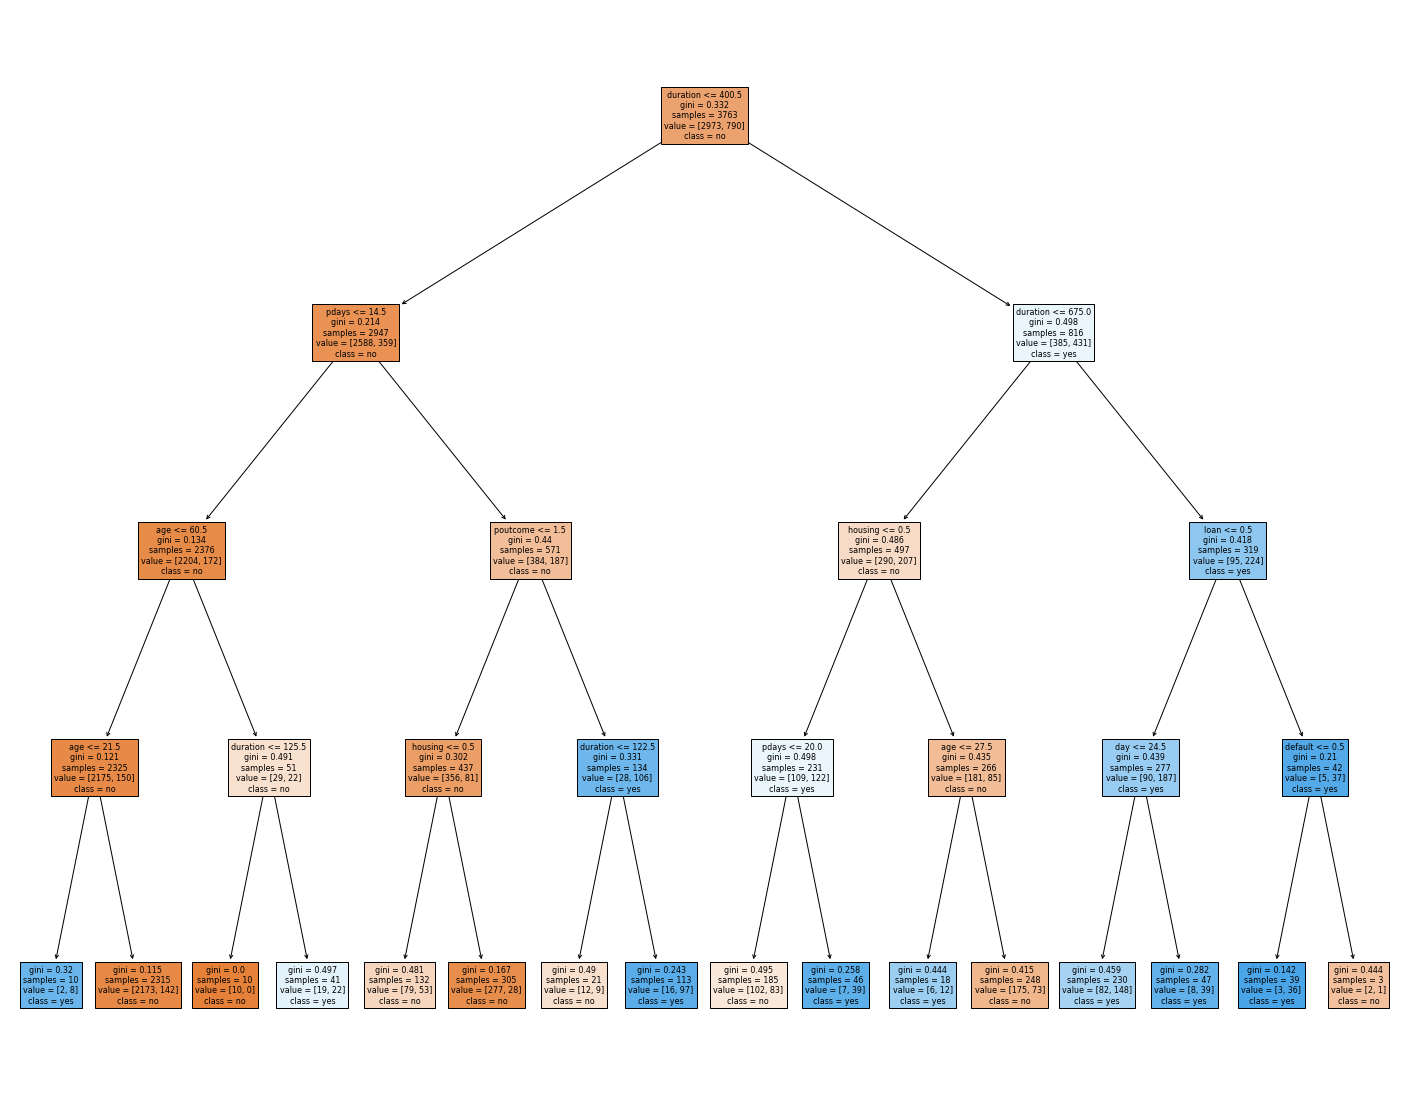

In [7]:
figure = plt.figure(figsize=(25,20))
tree.plot_tree(decision_tree_model,
               feature_names=X.columns,
               class_names=['no','yes'],
                filled=True)
plt.show()